<a href="https://colab.research.google.com/github/dishant42/RFM_analysis/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


1. Read the Data

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 100)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

from scipy.stats import kurtosis, skew
from scipy.cluster.hierarchy import linkage, dendrogram

from yellowbrick.cluster import KElbowVisualizer

from warnings import simplefilter
simplefilter("ignore")

from collections import Counter

In [3]:
data = pd.read_csv('/content/sales_data_sample.csv', encoding='unicode_escape')

data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')


The dataset has 2823 rows and 25 columns.


In [5]:
data.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


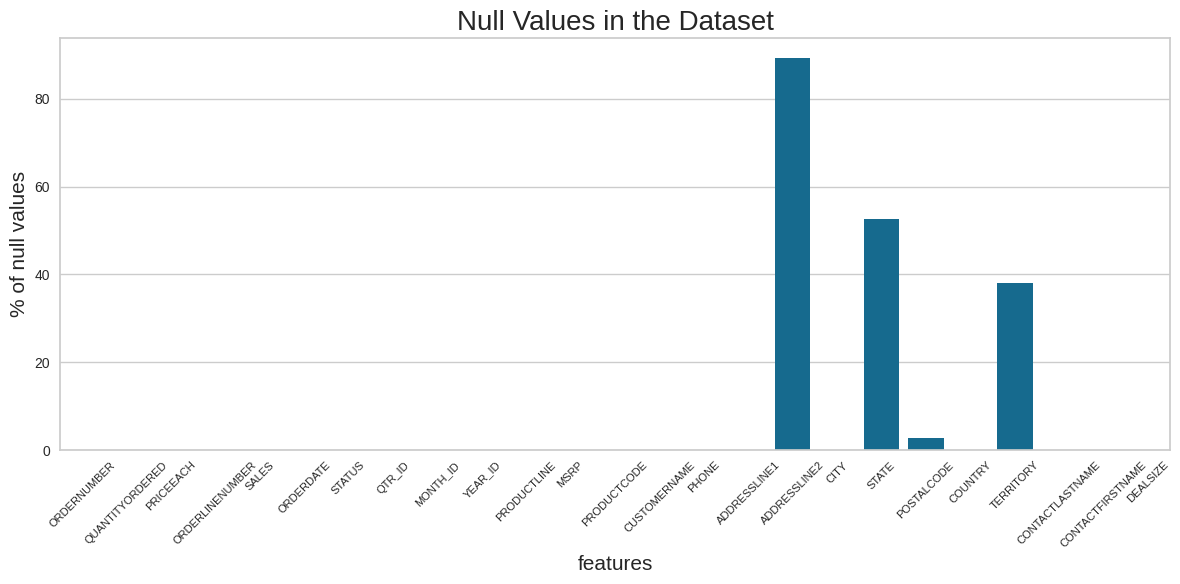

In [6]:
def plot_nulls(data, title, x_axis_label, y_axis_label):

    # number of nulls for each column
    data_nulls = (data.apply(lambda x: x.isnull().value_counts()).T[True] / len(data)*100).reset_index(name='count')

    plt.figure(figsize=(12,6))
    sns.barplot(data_nulls, x="index", y="count")

    plt.title(title, fontsize=20)
    plt.xlabel(x_axis_label, fontsize=15)
    plt.xticks(rotation=45, fontsize=8)
    plt.ylabel(y_axis_label, fontsize=15)

    plt.tight_layout()
    plt.show()

plot_nulls(data, "Null Values in the Dataset", 'features', '% of null values')

Checking for inconsistent data types



In [7]:
data.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


Changing the data type of variable 'ORDERDATE' from object to datetime



In [8]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data.dtypes


,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,datetime64[ns]
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


**2. Exploratory Data Analysis**

2.1 Customers and Their Countries

In [9]:
print(f"There are {data['CUSTOMERNAME'].nunique()} different customers.")

print(f"They are from {data['COUNTRY'].nunique()} different countries and {data['CITY'].nunique()} different cities.")

There are 92 different customers.
They are from 19 different countries and 73 different cities.


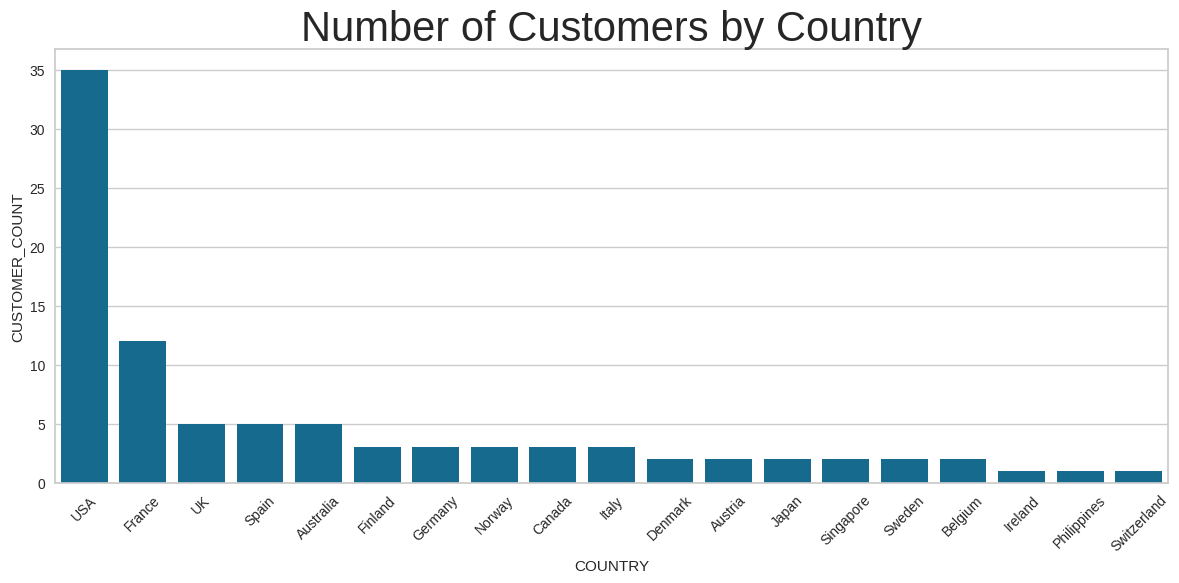

In [10]:
data_customers = data.groupby(['COUNTRY'])['CUSTOMERNAME'].nunique().reset_index(name='CUSTOMER_COUNT').sort_values('CUSTOMER_COUNT', ascending=False)

data_customers

plt.figure(figsize=(12,6))

sns.barplot(data=data_customers, x='COUNTRY', y='CUSTOMER_COUNT')
plt.xticks(rotation=45)
plt.title('Number of Customers by Country', size=30)

plt.tight_layout()

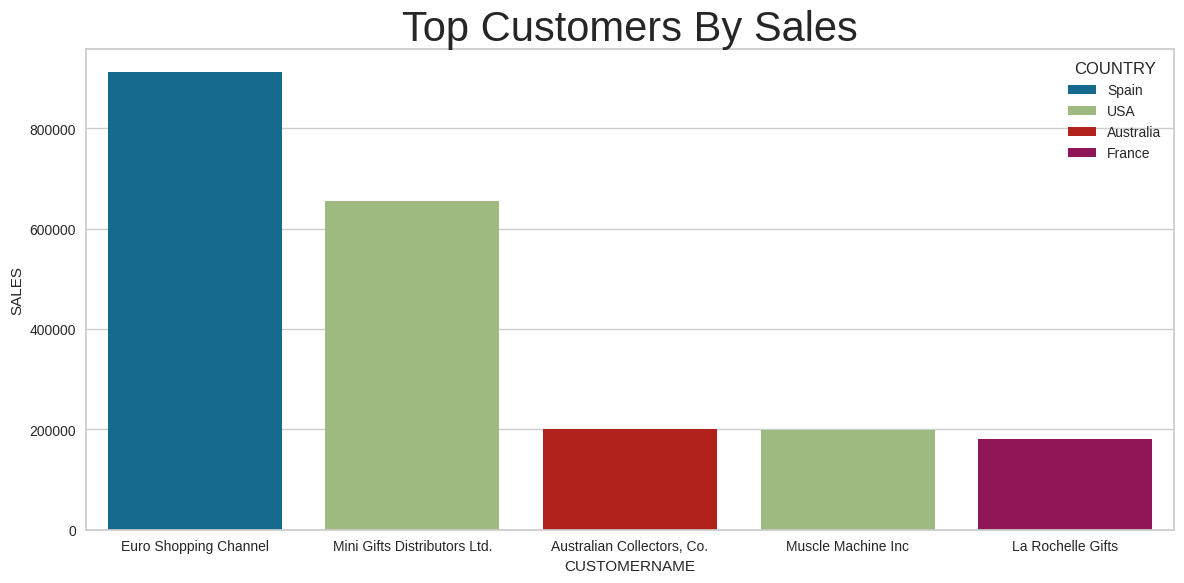

In [11]:
sales_customer = data.groupby(['CUSTOMERNAME', 'COUNTRY'])['SALES'].sum().reset_index().sort_values('SALES', ascending=False).head(5)

plt.figure(figsize=(12,6))

sns.barplot(data=sales_customer, x='CUSTOMERNAME', y='SALES', hue='COUNTRY')
plt.title('Top Customers By Sales', size=30)

plt.tight_layout()


In [12]:
data.groupby(['YEAR_ID'])['MONTH_ID'].nunique()


,MONTH_ID
YEAR_ID,
2003,12
2004,12
2005,5


WE HAVE INCOMPLETE DATA FOR 2005

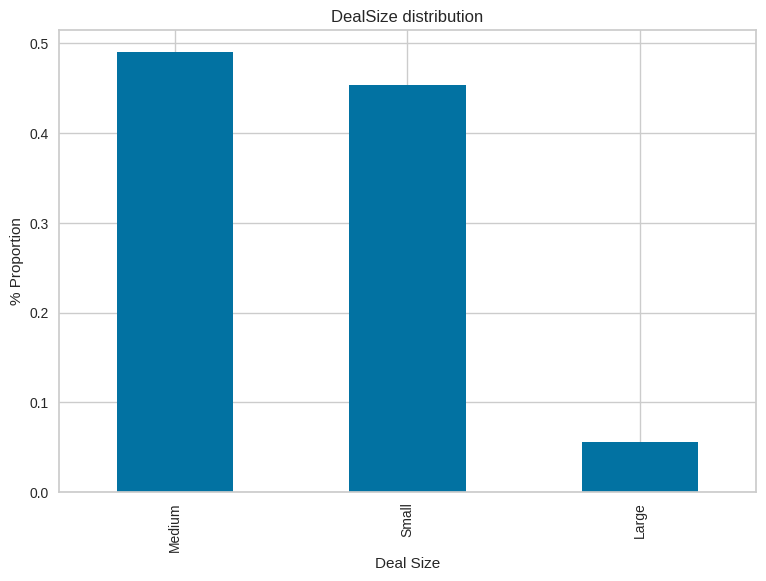

In [13]:
plt.figure(figsize=(9,6))
data['DEALSIZE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('DealSize distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()


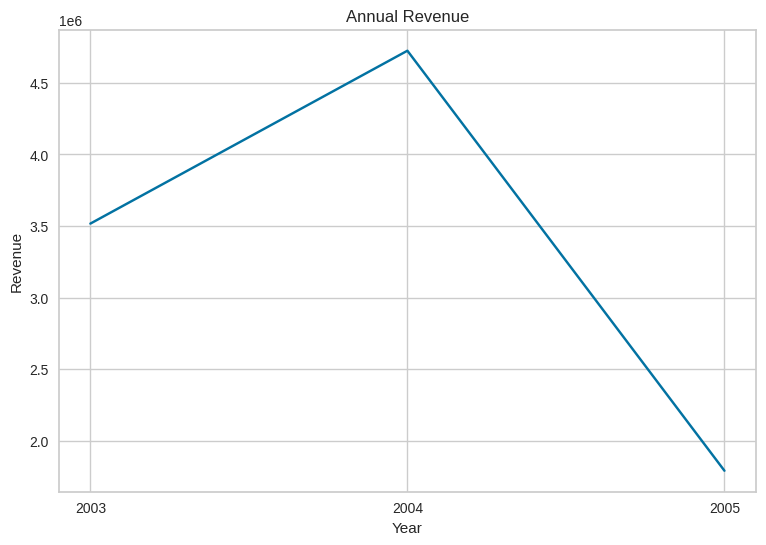

In [14]:
#Annual Revenue
plt.figure(figsize=(9,6))
data.groupby(['YEAR_ID'])['SALES'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Annual Revenue')
plt.xticks(np.arange(2003,2006,1))
plt.show()

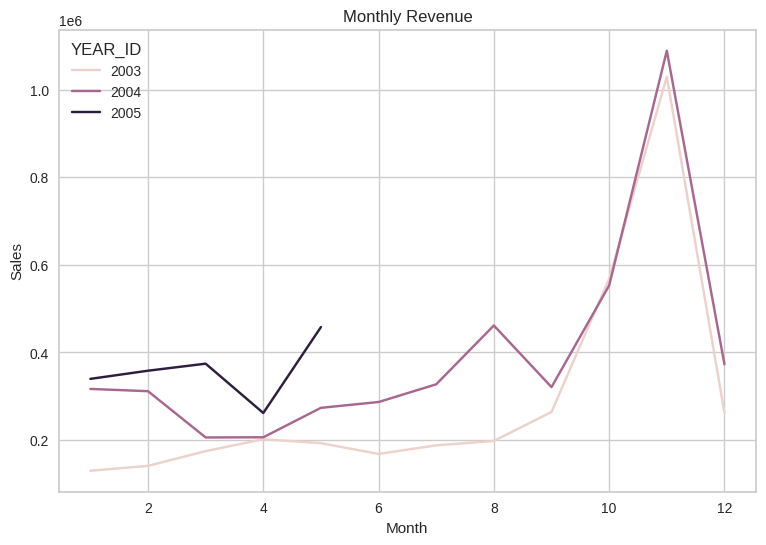

In [15]:
#Monthly Revenue
plt.figure(figsize=(9,6))

monthly_revenue = data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_revenue
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

This clearly shows that the revenue is growing especially in October and November. It can be the result of the seasonality(festivities). We can also observe that 2005 is performing better than the other years in terms of revenue having the maximum sales in all the months(Jan - May). The reason behind this spike of sales in 2005 can be further investigated to maintain high sales in future

In [16]:
monthly_revenue['MONTHLY GROWTH'] = monthly_revenue['SALES'].pct_change()
monthly_revenue.head()

,YEAR_ID,MONTH_ID,SALES,MONTHLY GROWTH
0,2003,1,129753.60,NaN
1,2003,2,140836.19,0.085413
2,2003,3,174504.90,0.239063
3,2003,4,201609.55,0.155323
4,2003,5,192673.11,-0.044325


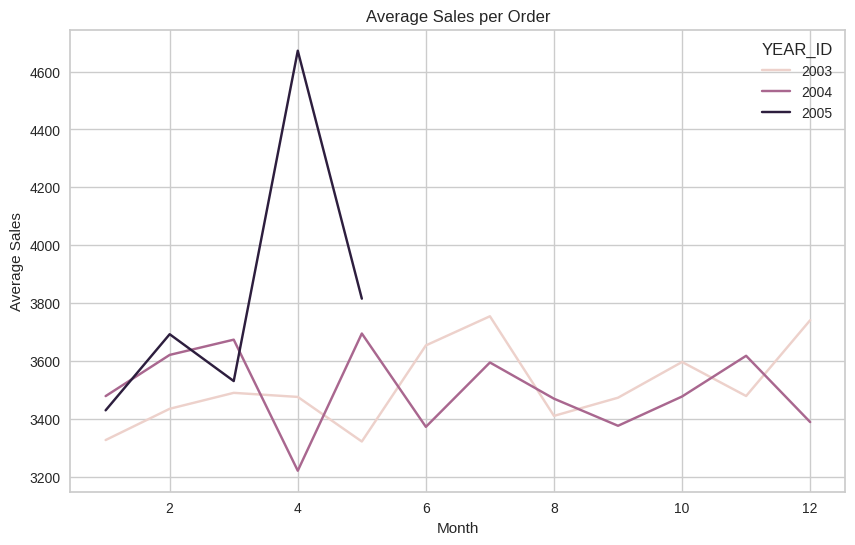

In [17]:
#Average Sales per Order
average_revenue = data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=average_revenue)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Order')
plt.show()

Monthly Active Customers¶


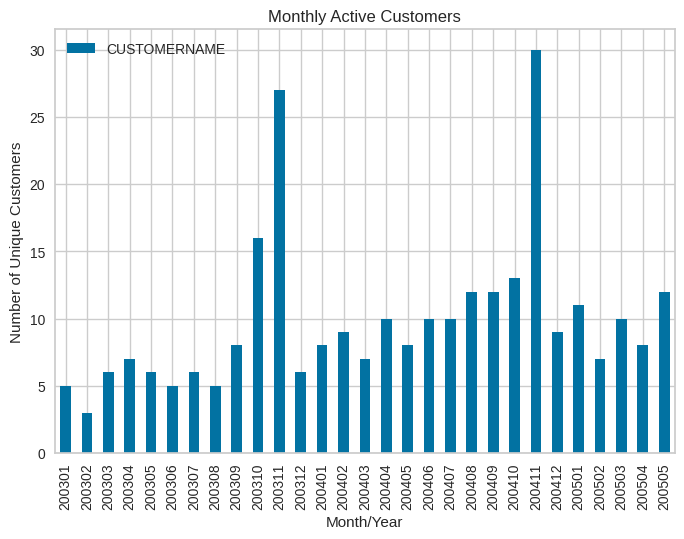

In [18]:
#plt.figure(figsize=(10,8))
data['YEAR_MONTH'] = data['YEAR_ID'].map(str)+data['MONTH_ID'].map(str).map(lambda x: x.rjust(2,'0'))
monthly_active = data.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()
monthly_active.plot(kind='bar',x='YEAR_MONTH',y='CUSTOMERNAME')
#plt.figure(figsize=(10,8))
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
#plt.figure(figsize=(10,8))
plt.show()

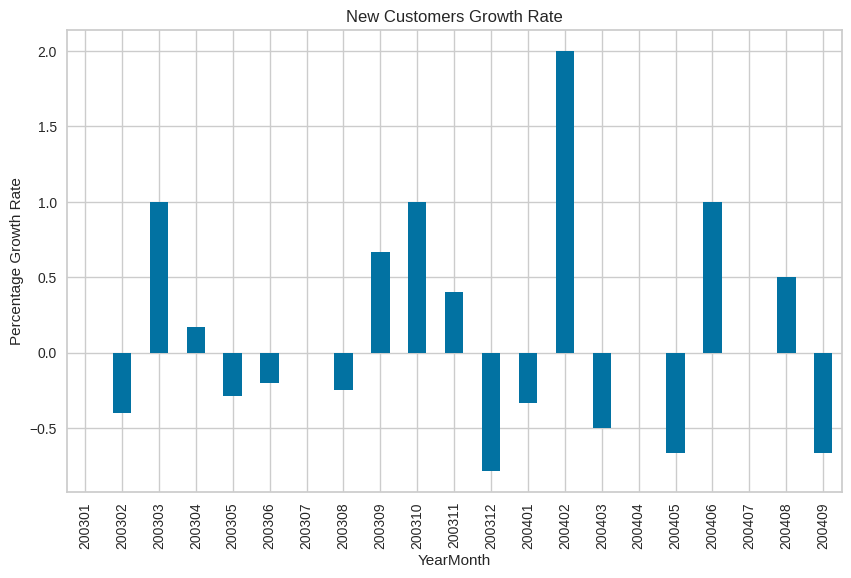

In [19]:
#New Customers Growth Rate
data_first_purchase = data.groupby('CUSTOMERNAME').YEAR_MONTH.min().reset_index()
data_first_purchase.columns = ['CUSTOMERNAME','FirstPurchaseDate']

plt.figure(figsize=(10,6))
data_first_purchase.groupby(['FirstPurchaseDate'])['CUSTOMERNAME'].nunique().pct_change().plot(kind='bar')
plt.title('New Customers Growth Rate')
plt.xlabel('YearMonth')
plt.ylabel('Percentage Growth Rate')
plt.show()

# **RFM ANALYSIS**

RFM (Recency, Frequency, Monetary) Analysis is a customer segmentation technique for analyzing customer value based on their past buying behavior. I am using it to analyze some aspects of the data and later for clustering.






Assuming that we are analyzing the next day of latest order date in the data set. Creating a variable "snapshot date"** which is the latest date in data set.

Recency : Recency is the number of days between the customer's latest order date and the snapshot date

Frequency: Number of purchases made by the customer

MonetaryValue: Revenue generated by the customer

In [20]:
import datetime as dt
# Calculate Recency, Frequency and Monetary value for each customer
snapshot_date = data['ORDERDATE'].max() + dt.timedelta(days=1) #latest date in the data set
df_RFM = data.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,
    'ORDERNUMBER': 'count',
    'SALES':'sum'})

#Renaming the columns
df_RFM.rename(columns={'ORDERDATE': 'Recency',
                   'ORDERNUMBER': 'Frequency',
                   'SALES': 'MonetaryValue'}, inplace=True)

In [21]:
df_RFM.head()


,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


Dividing the customer into 4 segments(Randomly Chosen)



In [22]:
#Dividing into segments

# Create a spend quartile with 4 groups - a range between 1 and 5
MonetaryValue_quartile = pd.qcut(df_RFM['MonetaryValue'], q=4, labels=range(1,5))
Recency_quartile = pd.qcut(df_RFM['Recency'], q=4, labels=list(range(4, 0, -1)))
Frequency_quartile = pd.qcut(df_RFM['Frequency'], q=4, labels=range(1,5))


# Assign the quartile values to the Spend_Quartile column in data
df_RFM['R'] = Recency_quartile
df_RFM['F'] = Frequency_quartile
df_RFM['M'] = MonetaryValue_quartile

#df_RFM[['MonetaryValue_Quartile','Recency_quartile','Frequency_quartile']] = [MonetaryValue_quartile,Recency_quartile,Frequency_quartile]

# Print data with sorted Spend values
#print(df_RFM.sort_values('MonetaryValue'))

df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M
CUSTOMERNAME,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4
Alpha Cognac,65,20,70488.44,4,2,2
Amica Models & Co.,265,26,94117.26,1,2,3
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4
Atelier graphique,188,7,24179.96,2,1,1


In [23]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10
Alpha Cognac,65,20,70488.44,4,2,2,8
Amica Models & Co.,265,26,94117.26,1,2,3,6
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11
Atelier graphique,188,7,24179.96,2,1,1,4


Labelling the levels

RFM Score > 10 - High Value Customer

RFM SCore < 10 and RFM Score >= 6 - Mid Value Customer

RFM Score < 6 - Low Value Customer

In [26]:
import numpy as np

# Define rfm_level function
def rfm_level(data):
    if data['RFM_Score'] >= 10:
        return 'High Value Customer'
    elif 6 <= data['RFM_Score'] < 10:
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'

# Create a new variable RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
df_RFM.head()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10,High Value Customer
Alpha Cognac,65,20,70488.44,4,2,2,8,Mid Value Customer
Amica Models & Co.,265,26,94117.26,1,2,3,6,Mid Value Customer
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11,High Value Customer
Atelier graphique,188,7,24179.96,2,1,1,4,Low Value Customer


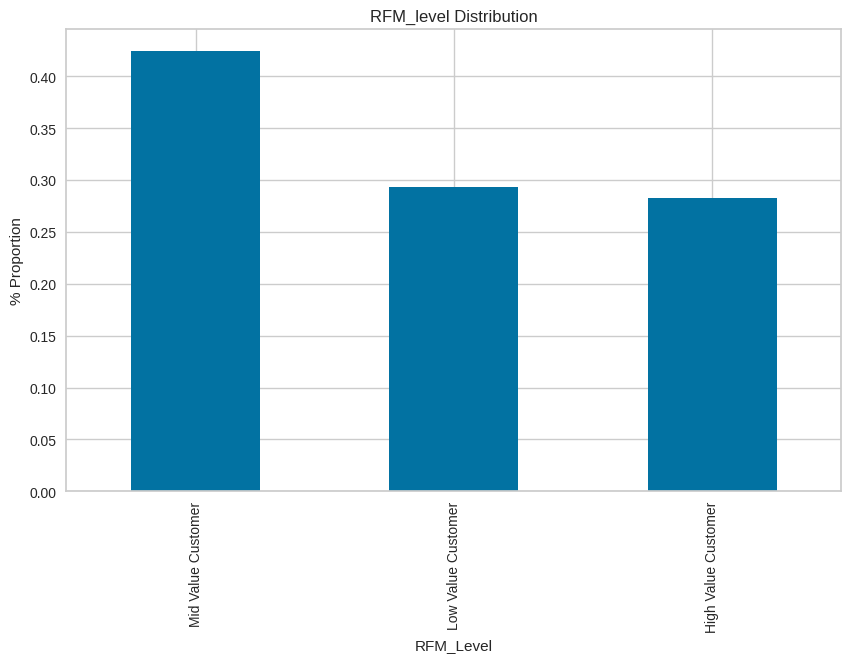

In [27]:
plt.figure(figsize=(10,6))
df_RFM['RFM_Level'].value_counts(normalize = True).plot(kind='bar')
plt.title('RFM_level Distribution')
plt.xlabel('RFM_Level')
plt.ylabel('% Proportion')
plt.show()


What quantity does exactly define that a customer is high value or mid value or low value????


In [28]:
#Analyzing customer segments
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_level_agg = df_RFM.groupby(['RFM_Level']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue':['mean','count']}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

                    Recency Frequency MonetaryValue      
                       mean      mean          mean count
RFM_Level                                                
High Value Customer    85.0      54.3      193532.1    26
Low Value Customer    293.8      15.0       52414.6    27
Mid Value Customer    171.2      25.8       91938.5    39


In [36]:
print(df_RFM.columns)
print(data.columns)



Index(['Recency', 'Frequency', 'MonetaryValue', 'R', 'F', 'M', 'RFM_Score',
       'RFM_Level'],
      dtype='object')
Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'YEAR_MONTH'],
      dtype='object')


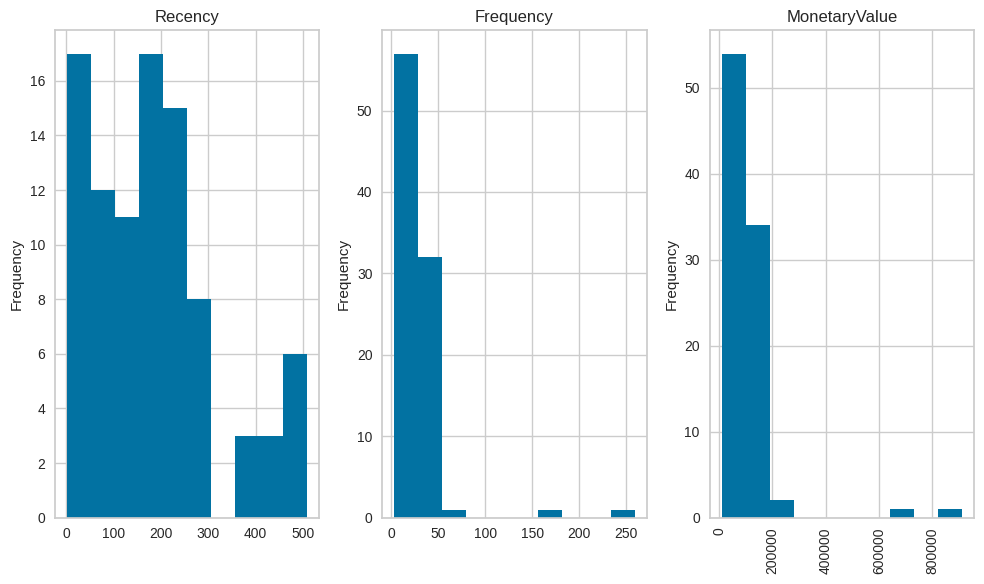

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
df_RFM['Recency'].plot(kind='hist')
plt.title('Recency')

plt.subplot(1,3,2)
df_RFM['Frequency'].plot(kind='hist')
plt.title('Frequency')

plt.subplot(1,3,3)
df_RFM['MonetaryValue'].plot(kind='hist')
plt.xticks(rotation=90)
plt.title('MonetaryValue')

plt.tight_layout()
plt.show()


Removing the skewness by performing log transformation on the variables


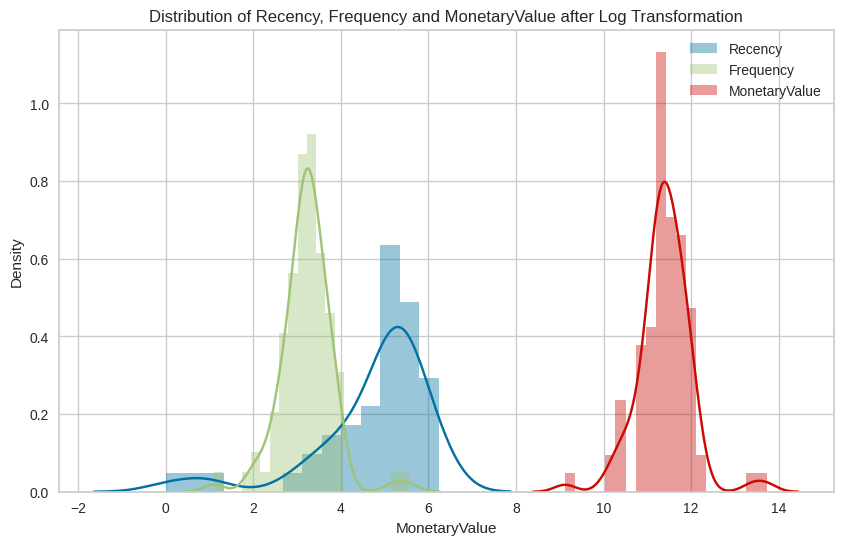

In [47]:
import numpy as np

# Select only the numeric columns for log transformation
numeric_columns = ['Recency', 'Frequency', 'MonetaryValue', 'RFM_Score']
df_RFM_numeric_columns = df_RFM[numeric_columns].apply(np.log)




# Plot the distributions
plt.figure(figsize=(10, 6))
sns.distplot(df_RFM_numeric_columns['Recency'], label='Recency')
sns.distplot(df_RFM_numeric_columns['Frequency'], label='Frequency')
sns.distplot(df_RFM_numeric_columns['MonetaryValue'], label='MonetaryValue')

plt.title('Distribution of Recency, Frequency and MonetaryValue after Log Transformation')
plt.legend()
plt.show()

Standardizing the variables using StandardScaler() for equal variance and mean



we have following data frames - data , df_RFM , df_RFM_numeric_columns and then we also have data_normalised that also uses df_RFM_numeric_columns

In [48]:
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(df_RFM_numeric_columns)

# Scale and center the data
data_normalized = scaler.transform(df_RFM_numeric_columns)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=df_RFM_numeric_columns.index, columns=df_RFM_numeric_columns.columns)

# Print summary statistics
data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue,RFM_Score
count,92.00,92.00,92.00,92.00
mean,0.00,-0.00,0.00,0.00
std,1.01,1.01,1.01,1.01
min,-3.51,-3.67,-3.82,-1.90
25%,-0.24,-0.41,-0.39,-0.71
50%,0.37,0.06,-0.04,0.06
75%,0.53,0.45,0.52,0.89
max,1.12,4.03,3.92,1.31


Choosing number of Clusters using Elbow Method¶


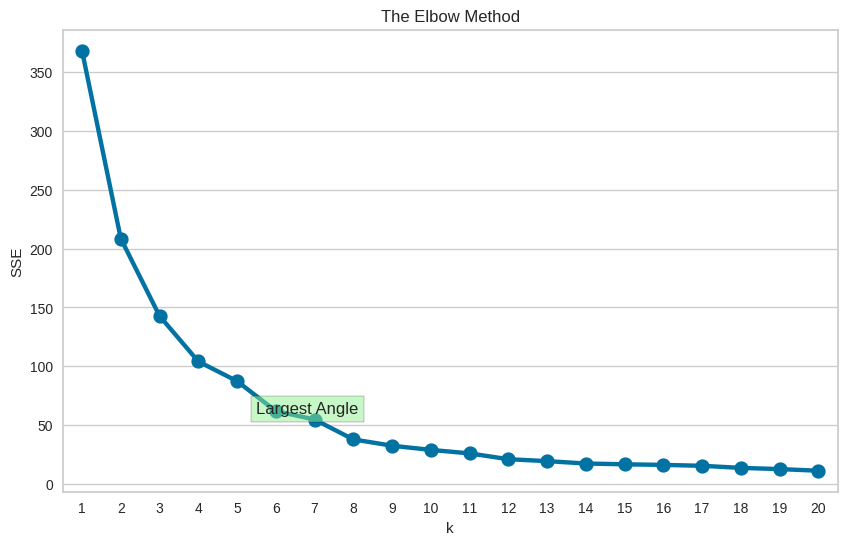

In [42]:
# Fit KMeans and calculate SSE for each k
sse={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_


plt.figure(figsize=(10,6))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.text(4.5,60,"Largest Angle",bbox=dict(facecolor='lightgreen', alpha=0.5))
plt.show()

Running KMeans with 5 clusters¶


In [49]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1)

# Fit k-means clustering on the normalized data set
kmeans.fit(data_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
data_rfm = df_RFM_numeric_columns.assign(Cluster=cluster_labels)
data_rfm.head()

,Recency,Frequency,MonetaryValue,RFM_Score,Cluster
CUSTOMERNAME,,,,,
"AV Stores, Co.",5.278115,3.931826,11.969133,2.302585,0
Alpha Cognac,4.174387,2.995732,11.163204,2.079442,4
Amica Models & Co.,5.579730,3.258097,11.452297,1.791759,1
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683,2.397895,0
Atelier graphique,5.236442,1.945910,10.093279,1.386294,2


In [50]:
# Group the data by cluster
grouped = data_rfm.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           3.5       3.7          11.9    21
1           5.5       3.0          11.2    21
2           5.6       2.4          10.5    16
3           0.5       5.4          13.6     2
4           4.9       3.3          11.5    32

In [53]:
df_RFM_numeric_columns

,Recency,Frequency,MonetaryValue,RFM_Score
CUSTOMERNAME,,,,
"AV Stores, Co.",5.278115,3.931826,11.969133,2.302585
Alpha Cognac,4.174387,2.995732,11.163204,2.079442
Amica Models & Co.,5.579730,3.258097,11.452297,1.791759
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683,2.397895
Atelier graphique,5.236442,1.945910,10.093279,1.386294
"Australian Collectables, Ltd",3.135494,3.135494,11.075837,1.945910
"Australian Collectors, Co.",5.214936,4.007333,12.211037,2.397895
"Australian Gift Network, Co",4.779123,2.708050,10.993212,1.609438
Auto Assoc. & Cie.,5.451038,2.890372,11.079590,1.098612


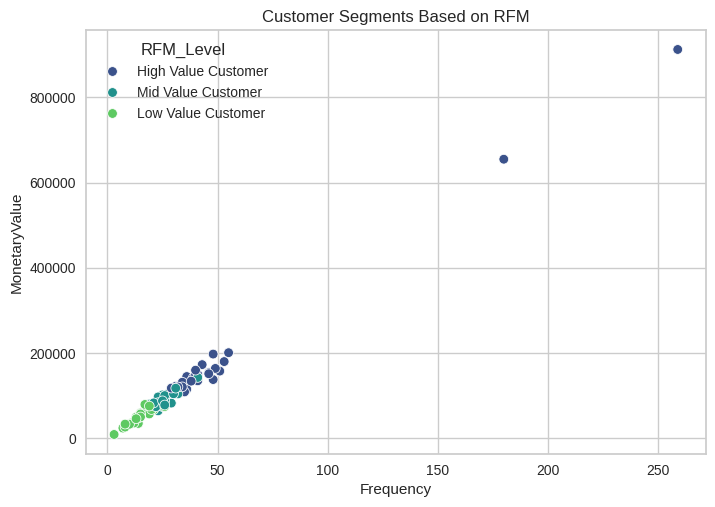

In [59]:
# RFM Cluster Visualization
sns.scatterplot(data=df_RFM, x='Frequency', y='MonetaryValue', hue='RFM_Level', palette='viridis') # Changed hue to 'RFM_Level' and data to df_RFM
plt.title('Customer Segments Based on RFM')
plt.show()